<a href="https://colab.research.google.com/github/yohanesnuwara/machine-learning/blob/master/datacamp_notebooks/DataCamp_02_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster
from scipy.stats import pearsonr

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!git clone https://github.com/yohanesnuwara/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 454, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 454 (delta 10), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (454/454), 40.03 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (147/147), done.


In [3]:
def get_stock_price_data():
  path = "https://assets.datacamp.com/production/repositories/655/datasets/1304e66b1f9799e1a5eac046ef75cf57bb1dd630/company-stock-movements-2010-2015-incl.csv"
  df = pd.read_csv(path)
  return df

def get_eurovision_data():
  path = "https://assets.datacamp.com/production/repositories/655/datasets/2a1f3ab7bcc76eef1b8e1eb29afbd54c4ebf86f2/eurovision-2016.csv"
  df = pd.read_csv(path)
  
  # Pivoting into televote rank 
  df = df.pivot(index='From country', columns='To country', values='Televote Rank')
  
  # fill NAs with 1
  df.fillna(1, inplace=True)  
  return df

def get_digits_data():
  path = "https://assets.datacamp.com/production/repositories/655/datasets/effd1557b8146ab6e620a18d50c9ed82df990dce/lcd-digits.csv"
  data = np.loadtxt(path, delimiter=',')
  return data

## Chapter 1.

* K-Means clustering
* Plot the centroid of clusters
* Clustering evaluation by cross-tabulation
* Clustering evaluation by inertial measurements & selecting optimum number of clusters by Elbow plot
* Normalization inside pipeline

In [4]:
# Load iris dataset
samples = load_iris()
samples = samples.data

print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

K-Means Clustering.

In [5]:
# Define KMeans model
model = KMeans(n_clusters=3)

# Fit
model.fit(samples)

# Predict
labels = model.predict(samples)

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Predict on new samples.

In [6]:
# We have new samples
new_samples = [[ 5.7, 4.4, 1.5, 0.4], 
              [ 6.5, 3., 5.5, 1.8], 
              [ 5.8, 2.7, 5.1, 1.9]]

# Predict on new samples
new_labels = model.predict(new_samples)

print(new_labels)

[0 2 1]


Scatter plot of clusters and centroids.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


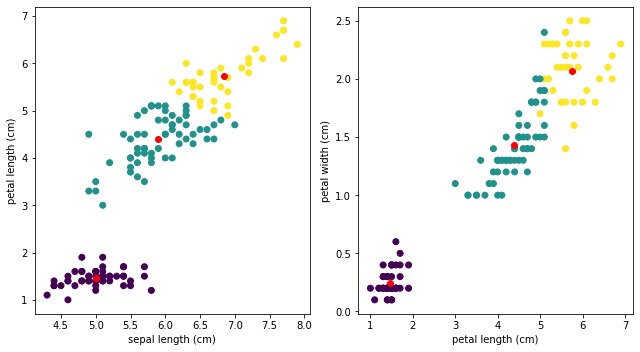

In [7]:
features = load_iris().feature_names
print(features)

# Centroid of clusters
centro = model.cluster_centers_

# Scatter plot
plt.figure(figsize=(9,5))

plt.subplot(1,2,1)
xs, ys = samples[:,0], samples[:,2]
plt.scatter(xs, ys, c=labels)

centrox, centroy = centro[:,0], centro[:,2] # centroid
plt.scatter(centrox, centroy, c='red')
plt.xlabel(features[0]); plt.ylabel(features[2])

plt.subplot(1,2,2)
xs, ys = samples[:,2], samples[:,3]
plt.scatter(xs, ys, c=labels)

centrox, centroy = centro[:,2], centro[:,3] # centroid
plt.scatter(centrox, centroy, c='red')
plt.xlabel(features[2]); plt.ylabel(features[3])

plt.tight_layout(1.1)
plt.show()

Clustering evaluation by cross-tabulation.

In [8]:
target = load_iris().target

def assign_names(label):
  if label==0:
    label = 'setosa'
  if label==1:
    label = 'versicolor'
  if label==2:
    label = 'virginica'
  return label

varieties = [assign_names(i) for i in target]

print(varieties)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [9]:
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

df

,labels,varieties
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,1,virginica
147,2,virginica
148,2,virginica


In [10]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  setosa  versicolor  virginica
labels                                  
0              50           0          0
1               0          48         14
2               0           2         36


As we see, the label 1 is all Setosa. However, the variety Virginica is assigned to label 0 and label 2. It seems that the cluster do not represent the variety too much. 

Clustering evaluation by inertia measurements & Elbow method.

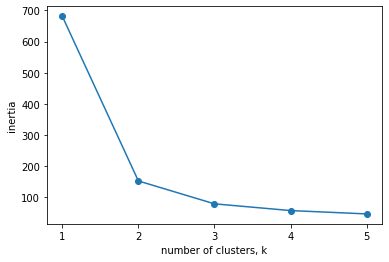

In [11]:
ks = range(1,6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

The elbow shows that cluster=3 with inertia around 70 is the most optimum number of clusters.

Normalizing data inside pipeline & comparing with not normalized data

In [12]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

# Without normalization
kmeans.fit(samples)
labels0 = kmeans.predict(samples)

# Crosstab of no normalization
df0 = pd.DataFrame({'labels': labels0, 'varieties': varieties})
ct0 = pd.crosstab(df0['labels'], df0['varieties'])
print(ct0)

# With normalization in pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels1 = pipeline.predict(samples)

# Crosstab of no normalization
df1 = pd.DataFrame({'labels': labels1, 'varieties': varieties})
ct1 = pd.crosstab(df1['labels'], df1['varieties'])
print(ct1)

varieties  setosa  versicolor  virginica
labels                                  
0               0          48         14
1              50           0          0
2               0           2         36
varieties  setosa  versicolor  virginica
labels                                  
0               0          11         36
1              50           0          0
2               0          39         14


Normalizing data inside pipeline.

In [13]:
# Get fish catch data
df = pd.read_csv('/content/datasets/fishcatch.csv')

df.head()

,Weight,Length1,Length2,Length3,Height%,Width%,species
0,242.0,23.2,25.4,30.0,38.4,13.4,Bream
1,290.0,24.0,26.3,31.2,40.0,13.8,Bream
2,340.0,23.9,26.5,31.1,39.8,15.1,Bream
3,363.0,26.3,29.0,33.5,38.0,13.3,Bream
4,430.0,26.5,29.0,34.0,36.6,15.1,Bream


In [14]:
# Define samples and true species
samples = df.iloc[:,:-1].values
species = df.iloc[:,-1].values

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

# With normalization in pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)

# Crosstabulation
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0     17     14
1           34     0      3      0
2            0    17      0      0


In [15]:
## Clustering which stock movements cluster together

# Get stock price data
df = get_stock_price_data()

df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,

In [16]:
# Stock movement
movements = df.iloc[:,1:].values

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

# With normalization in pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(movements)
labels = pipeline.predict(movements)

print(labels)

[0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Chapter 2.

* Hierarchial clustering with complete and single method
* Extract labels from clusters
* t-SNE 

Hierarchial clustering with Eurovision data.

In [17]:
df = get_eurovision_data()

df.head()

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,Georgia,Germany,Hungary,Israel,Italy,Latvia,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,9.0,1.0,13.0,19.0,14.0,3.0,20.0,12.0,22.0,11.0,25.0,15.0,10.0,17.0,2.0,21.0,7.0,16.0,6.0,4.0,26.0,23.0,8.0,24.0,5.0,18.0
Armenia,1.0,12.0,7.0,25.0,17.0,15.0,22.0,5.0,18.0,4.0,3.0,19.0,8.0,24.0,14.0,16.0,21.0,6.0,10.0,1.0,23.0,13.0,9.0,11.0,2.0,20.0
Australia,12.0,1.0,8.0,22.0,1.0,2.0,18.0,13.0,25.0,4.0,24.0,21.0,19.0,14.0,23.0,11.0,10.0,5.0,15.0,6.0,17.0,9.0,20.0,16.0,3.0,7.0
Austria,12.0,8.0,1.0,24.0,14.0,6.0,19.0,16.0,23.0,10.0,21.0,9.0,11.0,17.0,13.0,18.0,20.0,25.0,1.0,3.0,7.0,15.0,4.0,5.0,2.0,22.0
Azerbaijan,25.0,9.0,11.0,1.0,16.0,3.0,21.0,17.0,20.0,7.0,10.0,22.0,4.0,5.0,13.0,14.0,18.0,6.0,8.0,1.0,24.0,15.0,12.0,19.0,2.0,23.0


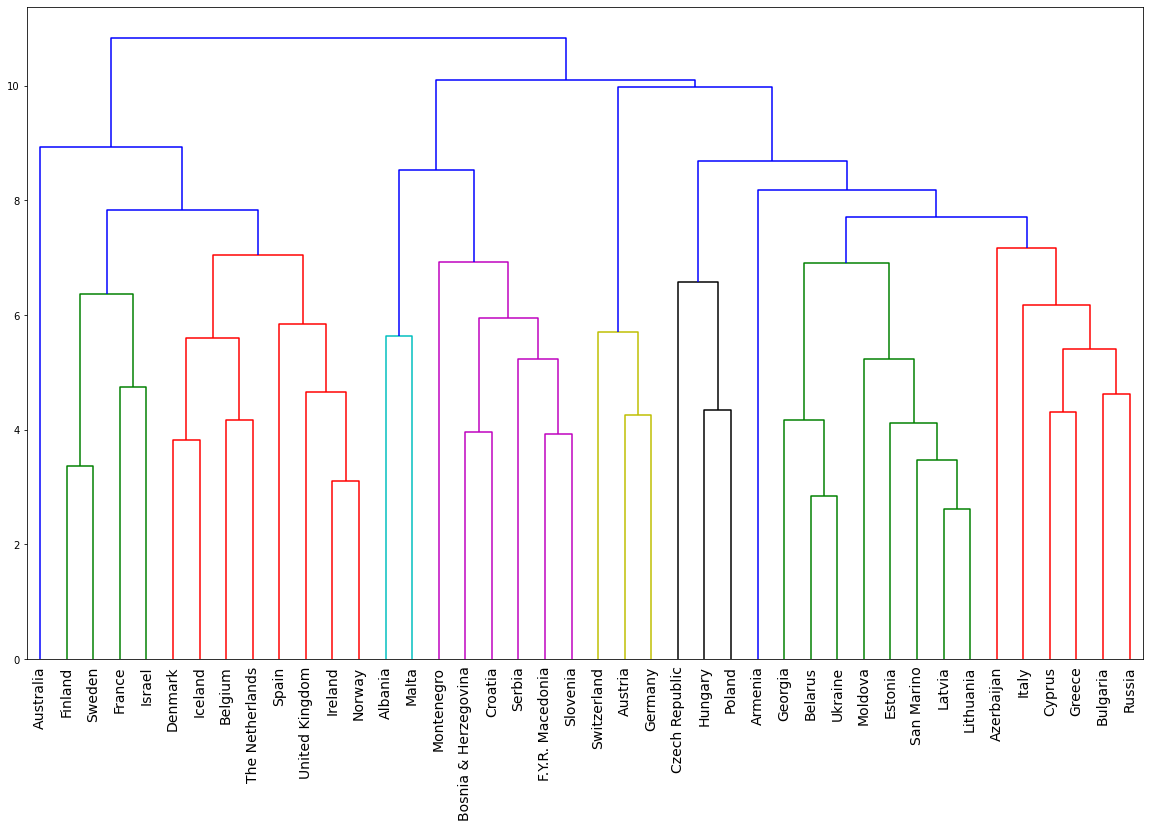

In [18]:
# Features
samples = df.iloc[:,1:].values

# Normalize the features by dividing it by its standard deviation 
# to give it unit variance.
samples = whiten(samples)

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20,12))# Plot the dendrogram
dn = dendrogram(mergings,
                labels=np.array(df.index),
                leaf_rotation=90,
                leaf_font_size=14)
plt.show()

Hierarchial clustering with Grains data.

In [19]:
df = pd.read_csv("/content/datasets/Grains.csv")

df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


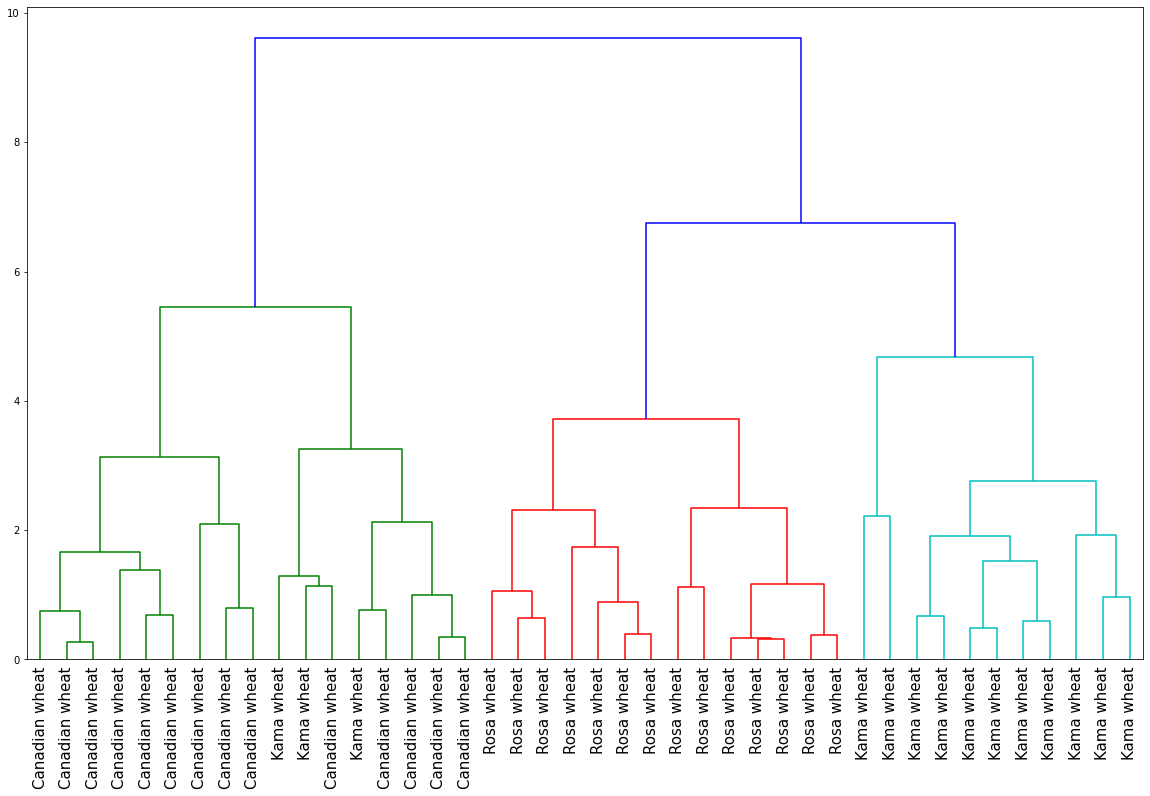

In [20]:
# remove the grain species from the DataFrame, save for later
varieties = list(df.pop('grain_variety'))

# extract the measurements as a NumPy array
samples = df.values

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(20,12))# Plot the dendrogram
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=15,
)
plt.show()

Extract labels from hierarchial clusters and cross-tabulation.

In [21]:
# Use fcluster with maximum height 6, to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')
print(labels)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

[3 3 3 3 3 1 3 3 1 3 3 3 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


2D t-SNE plot.

In [22]:
# Load iris data
iris = load_iris()

samples = iris.data
target = iris.target
species = iris.target_names

# Map species codes to colors, i.e. 0 to blue, 1 to red, 2 to orange (for plotting)
def list_color(varieties):
  if varieties==0:
    c = 'blue'
  if varieties==1:
    c = 'red'
  if varieties==2:
    c = 'orange'
  return c

colors = [list_color(i) for i in target]

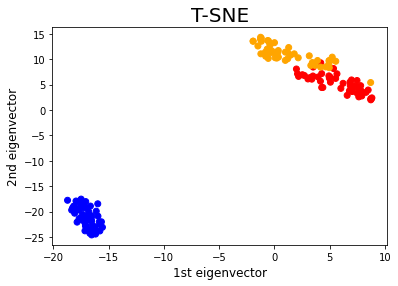

In [23]:
# Create TSNE, n_components=2 for 2D 
model = TSNE(learning_rate=100, n_components=2)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Scatter plot, coloring by variety_numbers
plt.scatter(x=tsne_features[:,0],
            y=tsne_features[:,1],
            c=colors)
plt.title('T-SNE', size=20)
plt.xlabel('1st eigenvector', size=12)
plt.ylabel('2nd eigenvector', size=12)
plt.show()

3D t-SNE plot.

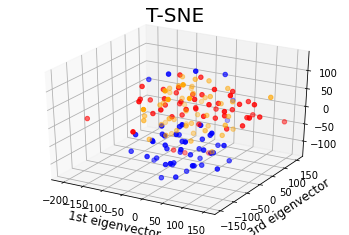

In [24]:
# Create TSNE, n_components=3 for 3D 
model = TSNE(learning_rate=100, n_components=3)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Scatter plot, coloring by variety_numbers
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=tsne_features[:,0],
           ys=tsne_features[:,1],
           zs=tsne_features[:,2],
           c=colors)
plt.title('T-SNE', size=20)
plt.xlabel('1st eigenvector', size=12)
plt.ylabel('2nd eigenvector', size=12)
plt.ylabel('3rd eigenvector', size=12)
plt.show()

## Chapter 3

* PCA and decorrelation
* Truncated SVD

PCA of 2 components (or 2D) and decorrelation.

In [25]:
# Load iris data
iris = load_iris()

samples = iris.data
target = iris.target
species = iris.target_names
feature = iris.feature_names

# Map species codes to colors, i.e. 0 to blue, 1 to red, 2 to orange (for plotting)
def list_color(varieties):
  if varieties==0:
    c = 'blue'
  if varieties==1:
    c = 'red'
  if varieties==2:
    c = 'orange'
  return c

colors = [list_color(i) for i in target]

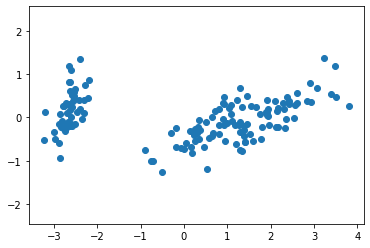

Pearson coefficient after decorrelation with PCA: 1.1382082484214173e-15


In [26]:
# Define PCA (n_components=2 for 2D plot)
model = PCA(n_components=2)

# Fit model to points
model.fit(samples)

# Transform data
transformed = model.transform(samples)

# Assign 0th column of pca_features: xs
xs = transformed[:,0]

# Assign 1st column of pca_features: ys
ys = transformed[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print('Pearson coefficient after decorrelation with PCA:', correlation)

2D PCA (with biplot; principal component direction arrows).

Biplot source: https://github.com/ostwalprasad/ostwalprasad.github.io/blob/master/jupyterbooks/2019-01-20-PCA%20using%20python.ipynb

Mean:
[5.84333333 3.05733333 3.758      1.19933333]
Principal components:
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


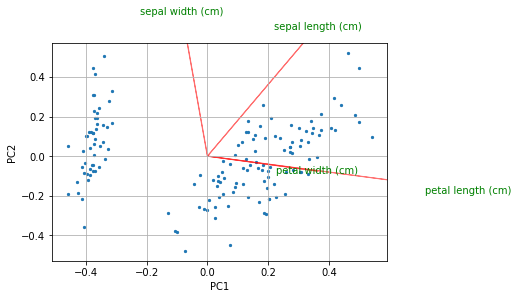

In [27]:
# Define PCA (n_components=2 for 2D plot)
model = PCA(n_components=2)

# Fit model to points
model.fit(samples)

# Get the mean of samples
mean = model.mean_
print('Mean:')
print(mean)

# Get the principal components: first_pc
pc = model.components_
print('Principal components:')
print(pc)

# Transform data
transformed = model.transform(samples)

score = transformed[:,0:2]
coeff = np.transpose(pc[0:2,:])

def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(score, coeff, feature)
plt.show()

Intrinsic dimension of PCA.

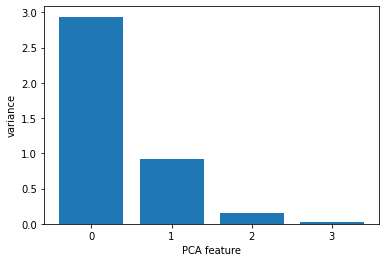

In [28]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Intrinsic dimension = 2, because they're the highest.

Truncated Single Value Decomposition (SVD)

In [29]:
# Get Wikipedia article dataset
df = pd.read_csv("/content/datasets/wikipedia-vectors.csv")

df.head(10)

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,Global warming,Nationally Appropriate Mitigation Action,Nigel Lawson,Connie Hedegaard,Climate change,Kyoto Protocol,350.org,Greenhouse gas emissions by the United States,2010 United Nations Climate Change Conference,2007 United Nations Climate Change Conference,Angelina Jolie,Michael Fassbender,Denzel Washington,Catherine Zeta-Jones,Jessica Biel,Russell Crowe,Mila Kunis,Dakota Fanning,Anne Hathaway,Jennifer Aniston,France national football team,Cristiano Ronaldo,Arsenal F.C.,Radamel Falcao,Zlatan Ibrahimović,Colombia national football team,2014 FIFA World Cup qualification,Football,Neymar,Franck Ribéry,Tonsillitis,Hepatitis B,Doxycycline,Leukemia,Gout,Hepatitis C,Prednisone,Fever,Gabapentin,Lymphoma,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.020076,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.008878,0.0,0.000000,0.049502,0.000000,0.00000,0.0
1,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00611,0.0
2,2,0.0,0.029607,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.017294,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.007054,0.006915,0.0,0.014745,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020774,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0
3,3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.005646,0.00000,0.0
4,4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.029339,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0
5,5,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0
6,6,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0
7,7,0.0,0.000000,0.003772,0.0,0.0,0.0,0.0,0.0,0.031222,0.0,0.0,0.0,0.000000,0.0,0.0,0.003673,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.016657,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.004690,0.00000,0.0
8,8,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.005429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0000

In [30]:
articles = df.iloc[:,1:].values
titles = df.iloc[:,0].values

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
df.sort_values('label')

,label,article
0,0,0
8671,0,8671
8672,0,8672
8673,0,8673
8674,0,8674
...,...,...
5198,5,5198
9225,5,9225
7755,5,7755
9318,5,9318


## Chapter 4. 

* Non-negative Matrix Factorization (NMF)

Topic modeling with NMF.

In [31]:
# Get Wikipedia article dataset
df = pd.read_csv("/content/datasets/wikipedia-vectors.csv")

articles = df.iloc[:,1:].values
titles = df.iloc[:,0].values
words = words = df.columns[1:]

# Create an NMF instance: model
n_components = 6
model = NMF(n_components=n_components)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
# print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
# print(df.loc['Denzel Washington'])

[[7.70000817e-03 0.00000000e+00 0.00000000e+00 5.16316767e-03
  0.00000000e+00 1.55636750e-04]
 [8.18905601e-04 1.09532273e-05 8.49231557e-06 0.00000000e+00
  6.02577608e-04 0.00000000e+00]
 [0.00000000e+00 6.47424539e-03 0.00000000e+00 3.80341919e-03
  5.21365624e-03 9.82241549e-03]
 ...
 [0.00000000e+00 3.21560096e-03 0.00000000e+00 2.16796869e-03
  2.03147825e-04 2.69560499e-03]
 [2.86800162e-04 3.39605868e-04 1.46331500e-04 8.36325547e-03
  1.43268786e-03 1.88848478e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


Cannot find for "Anne Hathaway" and "Denzel Washington" because the dataset doesn't have names of the articles. But the principle of doing NMF has been explained well here.

In [32]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)
print(components_df)

# Print top words of each NMF components
for i in range(n_components): 
  component = components_df.iloc[i]
  print('Top words of NMF component {}'.format(i+1))   
  print(component.nlargest())
  print('\n')

   HTTP 404  Alexa Internet  ...    Sepsis  Adam Levine
0  0.000000        0.000000  ...  0.432467     0.558816
1  0.000000        0.000000  ...  0.011692     0.012595
2  0.000000        0.000000  ...  0.011179     0.000000
3  0.000000        0.000000  ...  0.008454     0.079165
4  0.000000        0.000000  ...  0.177051     0.012819
5  0.392302        0.504646  ...  0.008230     0.000000

[6 rows x 60 columns]
Top words of NMF component 1
Black Sabbath            0.676433
Red Hot Chili Peppers    0.657690
Arctic Monkeys           0.647104
The Wanted               0.587888
Adam Levine              0.558816
Name: 0, dtype: float64


Top words of NMF component 2
Radamel Falcao        0.564138
Franck Ribéry         0.562305
Zlatan Ibrahimović    0.532639
Cristiano Ronaldo     0.531998
Neymar                0.409027
Name: 1, dtype: float64


Top words of NMF component 3
2010 United Nations Climate Change Conference    0.539066
Global warming                                   0.519216
Kyoto

Seen from above lists, NMF 1 associates with topic "music", NMF 2 is "soccer player", NMF 3 is "climate change", NMF 4 is "celebrity", NMF 5 is "disease", and NMF 6 is "internet".

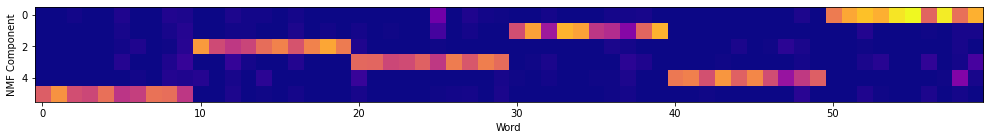

In [33]:
# Imshow plot
ko = components_df.values

plt.figure(figsize=(17,3))
plt.imshow(ko, cmap='plasma')
plt.xlabel("Word"); plt.ylabel("NMF Component")
plt.show()

LED digits differentiation with NMF

In [34]:
# Get digits data
samples = get_digits_data()

samples

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


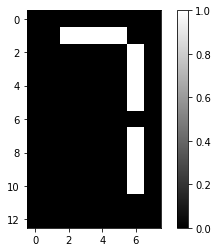

In [35]:
# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

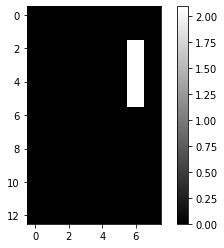

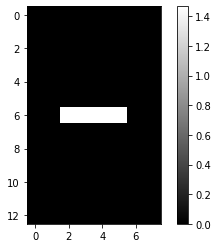

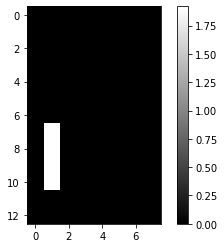

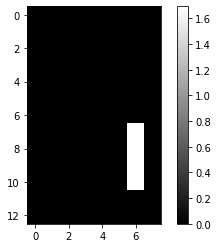

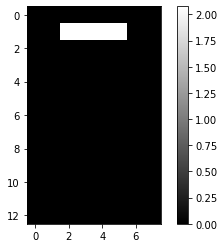

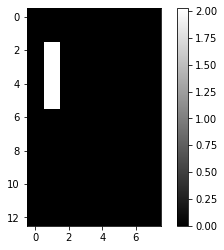

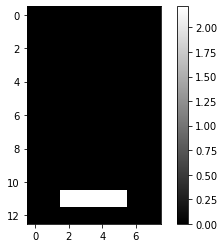

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37551667e-16]


In [36]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

Music recommender system with NMF.

In [56]:
# # Load musical artist dataset
# path = "/content/datasets/musical_artist.csv"

# df = pd.read_csv(path)

# df.head()

In [55]:
# # Artist names
# names = np.array(
#     ['Massive Attack', 'Sublime', 'Beastie Boys', 'Neil Young',
#     'Dead Kennedys', 'Orbital', 'Miles Davis', 'Leonard Cohen',
#     'Van Morrison', 'NOFX', 'Rancid', 'Lamb', 'Korn',
#     'Dropkick Murphys', 'Bob Dylan', 'Eminem', 'Nirvana', 'Van Halen',
#     'Damien Rice', 'Elvis Costello', 'Everclear', 'Jimi Hendrix',
#     'PJ Harvey', 'Red Hot Chili Peppers', 'Ryan Adams', 'Soundgarden',
#     'The White Stripes', 'Madonna', 'Eric Clapton', 'Bob Marley',
#     'Dr. Dre', 'The Flaming Lips', 'Tom Waits', 'Moby', 'Cypress Hill',
#     'Garbage', 'Fear Factory', '50 Cent', 'Ani DiFranco',
#     'Matchbox Twenty', 'The Police', 'Eagles', 'Phish',
#     'Stone Temple Pilots', 'Black Sabbath', 'Britney Spears',
#     'Fatboy Slim', 'System of a Down', 'Simon & Garfunkel',
#     'Snoop Dogg', 'Aimee Mann', 'Less Than Jake', 'Rammstein',
#     'Reel Big Fish', 'The Prodigy', 'Pantera', 'Foo Fighters',
#     'The Beatles', 'Incubus', 'Audioslave', 'Bright Eyes',
#     'Machine Head', 'AC/DC', 'Dire Straits', 'Motörhead', 'Ramones',
#     'Slipknot', 'Me First and the Gimme Gimmes', 'Bruce Springsteen',
#     'Queens of the Stone Age', 'The Chemical Brothers', 'Bon Jovi',
#     'Goo Goo Dolls', 'Alice in Chains', 'Howard Shore',
#     'Barenaked Ladies', 'Anti-Flag', 'Nick Cave and the Bad Seeds',
#     'Static-X', 'Misfits', '2Pac', 'Sparta', 'Interpol',
#     'The Crystal Method', 'The Beach Boys', 'Goldfrapp',
#     'Bob Marley & the Wailers', 'Kylie Minogue', 'The Blood Brothers',
#     'Mirah', 'Ludacris', 'Snow Patrol', 'The Mars Volta',
#     'Yeah Yeah Yeahs', 'Iced Earth', 'Fiona Apple', 'Rilo Kiley',
#     'Rufus Wainwright', 'Flogging Molly', 'Hot Hot Heat', 'Dredg',
#     'Switchfoot', 'Tegan and Sara', 'Rage Against the Machine',
#     'Keane', 'Jet', 'Franz Ferdinand', 'The Postal Service',
#     'The Dresden Dolls', 'The Killers', 'Death From Above 1979'])

In [54]:
# # Features
# artists = df.values

# # Create a MaxAbsScaler: scaler
# scaler = MaxAbsScaler()

# # Create an NMF model: nmf
# nmf = NMF(n_components=20)

# # Create a Normalizer: normalizer
# normalizer = Normalizer()

# # Create a pipeline: pipeline
# pipeline = make_pipeline(scaler, nmf, normalizer)

# # Apply fit_transform to artists: norm_features
# norm_features = pipeline.fit_transform(artists)

# # Create a DataFrame: df
# df = pd.DataFrame(norm_features, index=names)

# # Select row of 'Bruce Springsteen': artist
# artist = df.loc['Bruce Springsteen']

# # Compute cosine similarities: similarities
# similarities = df.dot(artist)

# # Display those with highest cosine similarity
# print(similarities.nlargest())